In [226]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [30, 15] # width, height
#plt.rcParams['axes.xmargin'] = 0.05

In [219]:
df = pd.read_excel("C:\\Users\\ZM\\Desktop\\CODE\\DATA SCIENCE\\tivlon\\futures\\DCE Iron Ore Datas.xls", skiprows=[1], skipfooter=1)
df.dropna(how="all", inplace=True)
df.columns=["date", "price", "closing", "vol", "oi"]
#df = df[(df['date'] >= '2018-1-1')]

In [269]:
df["price %chg"] = (df["price"].pct_change(1)*100).round(2)

df["price 20d sma"] = df["price"].rolling(20).mean()
df["price 50d sma"] = df["price"].rolling(50).mean()
df["price 100d sma"] = df["price"].rolling(100).mean()
df["price 200d sma"] = df["price"].rolling(200).mean()

df["vol chg"] = (df["vol"].pct_change(1)).round(2)

df["vol 5d sma"] = df["vol"].rolling(5).mean()
df["vol 7d sma"] = df["vol"].rolling(7).mean()
df["vol 10d sma"] = df["vol"].rolling(10).mean()

df["vol std"] = df["vol"].rolling(5).std().round(2)
df["vol std chg"] = (df["vol"] - df["vol"].rolling(10).mean()) / df["vol"].rolling(10).std()
df["vol std chg ma"] = df["vol std chg"].rolling(10).mean()

df["oi chg"] = (df["oi"].pct_change(1)).round(2)
df["oi 10d sma"] = df["oi"].rolling(10).mean()

df["diff"] = df["vol"] - df["oi"]
df["diff 5d sma"] = df["diff"].rolling(5).mean()

print(df.tail(5))

           date  price  closing        vol         oi  price %chg  \
1388 2019-06-26  795.5    804.0  2646276.0  1609492.0       -1.30   
1389 2019-06-27  821.5    821.5  3016596.0  1714706.0        3.27   
1390 2019-06-28  833.5    838.5  2351208.0  1774126.0        1.46   
1391 2019-07-01  855.5    873.0  2142258.0  1778972.0        2.64   
1392 2019-07-02  886.5    900.0  2766620.0  1719956.0        3.62   

      price 20d sma  price 50d sma  price 100d sma  price 200d sma  ...  \
1388        762.000         701.64         659.155        580.3925  ...   
1389        766.025         705.03         662.045        582.0775  ...   
1390        770.750         708.63         665.025        583.8350  ...   
1391        776.800         712.83         668.045        585.6950  ...   
1392        785.325         718.05         671.350        587.7225  ...   

      vol 5d sma    vol 3d sma    vol 7d sma  vol 10d sma  oi 10d sma  \
1388   2650684.4  2.476432e+06  2.730050e+06    2637879.2   1

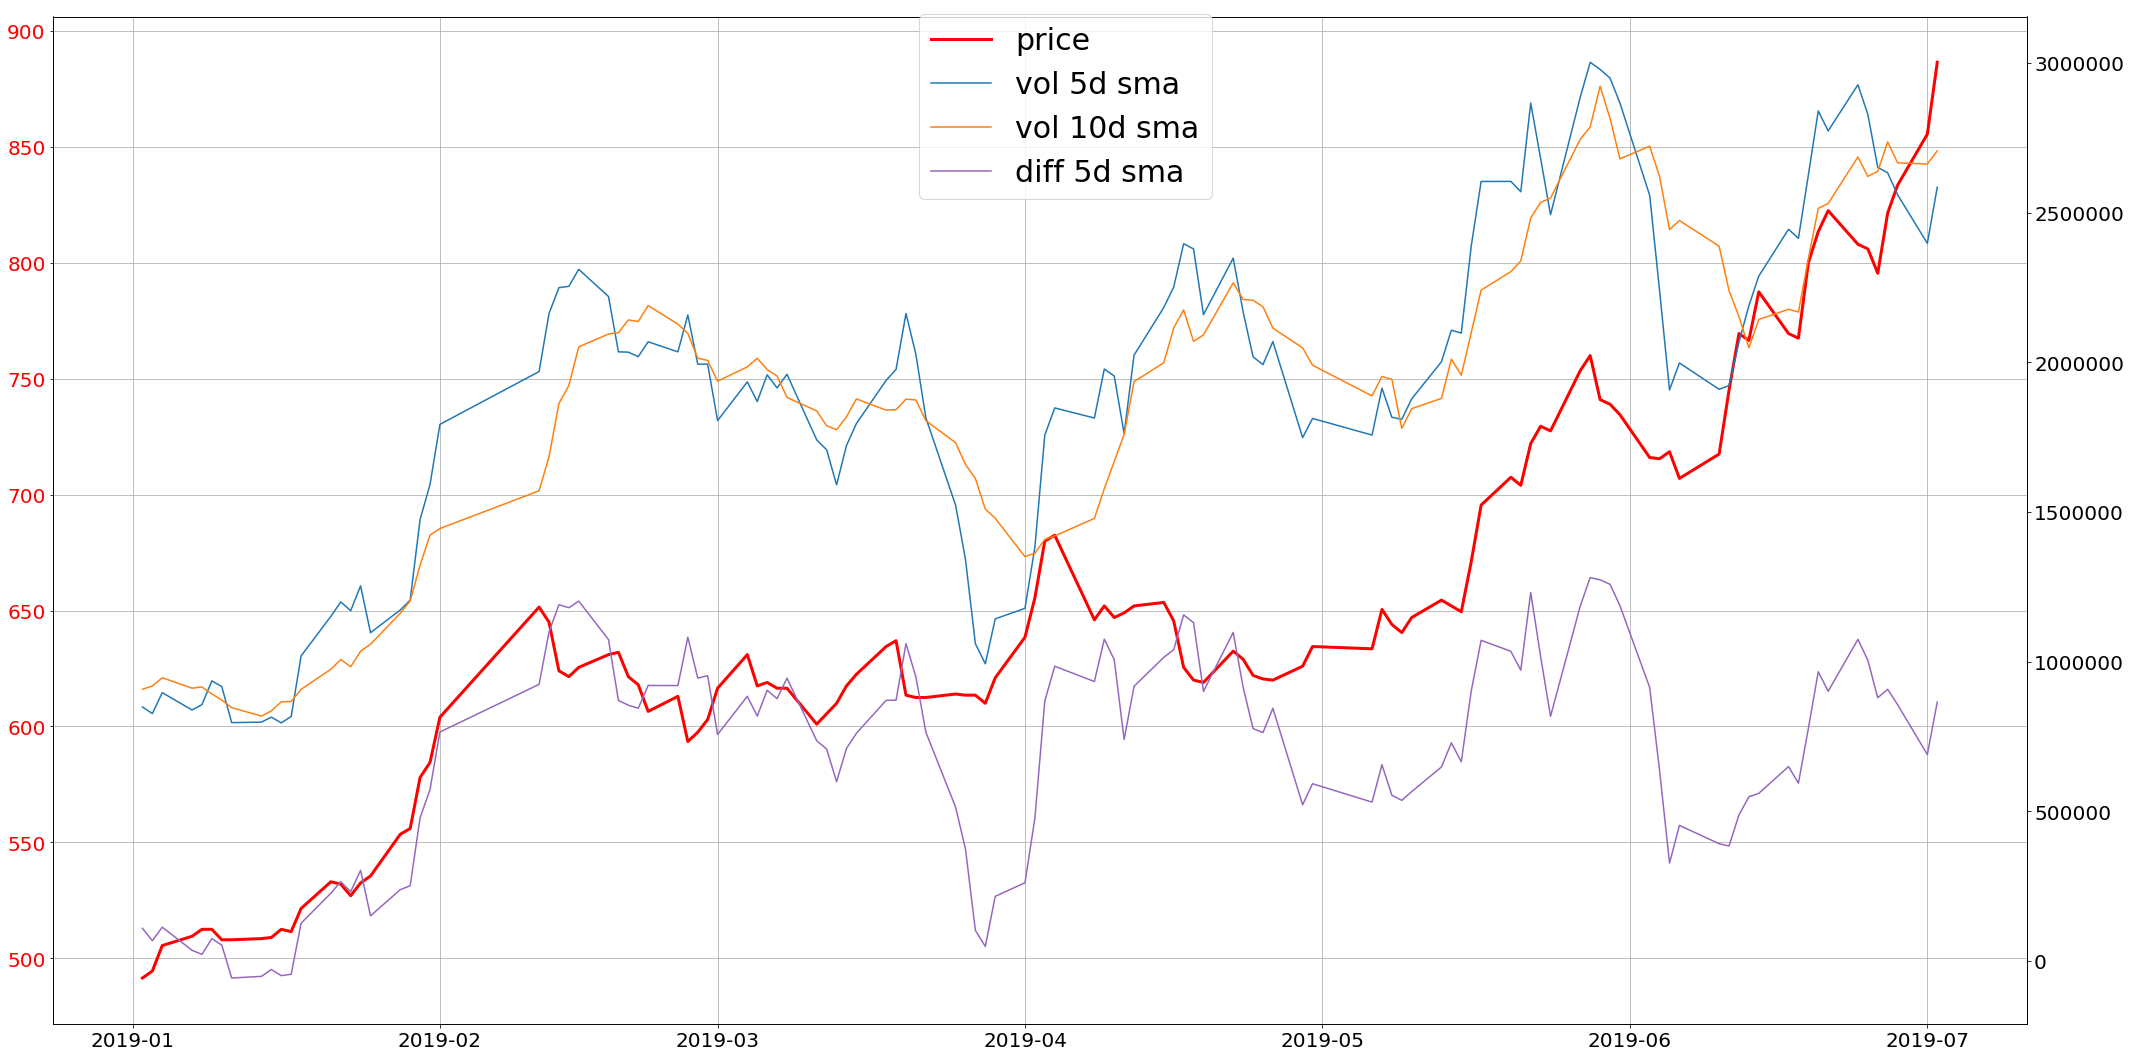

In [271]:
this_df = df[(df['date'] >= '2019-1-1')]
fig, ax1 = plt.subplots()
#plt.xticks(rotation=45)

color="red"
#ax1.set_xlabel('date')
ax1.plot(this_df["date"], this_df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)

ax1.grid(True)

ax2 = ax1.twinx()

#ax2.bar(this_df["date"], this_df["vol"], color="tab:orange", label="vol", width=0.25)
ax2.plot(this_df["date"], this_df["vol 5d sma"], color="tab:blue", label="vol 5d sma")
ax2.plot(this_df["date"], this_df["vol 10d sma"], color="tab:orange", label="vol 10d sma")
#ax2.plot(this_df["date"], this_df["vol 7d sma"], color="tab:pink", label="vol 7d sma")
#ax2.plot(this_df["date"], this_df["oi"], color="tab:orange", label="oi 5d sma")

#ax2.bar(this_df["date"], this_df["oi 10d sma"], color="tab:green", label="oi 10d sma", width=0.5)
ax2.plot(this_df["date"], this_df["diff 5d sma"], color="tab:purple", label="diff 5d sma")

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

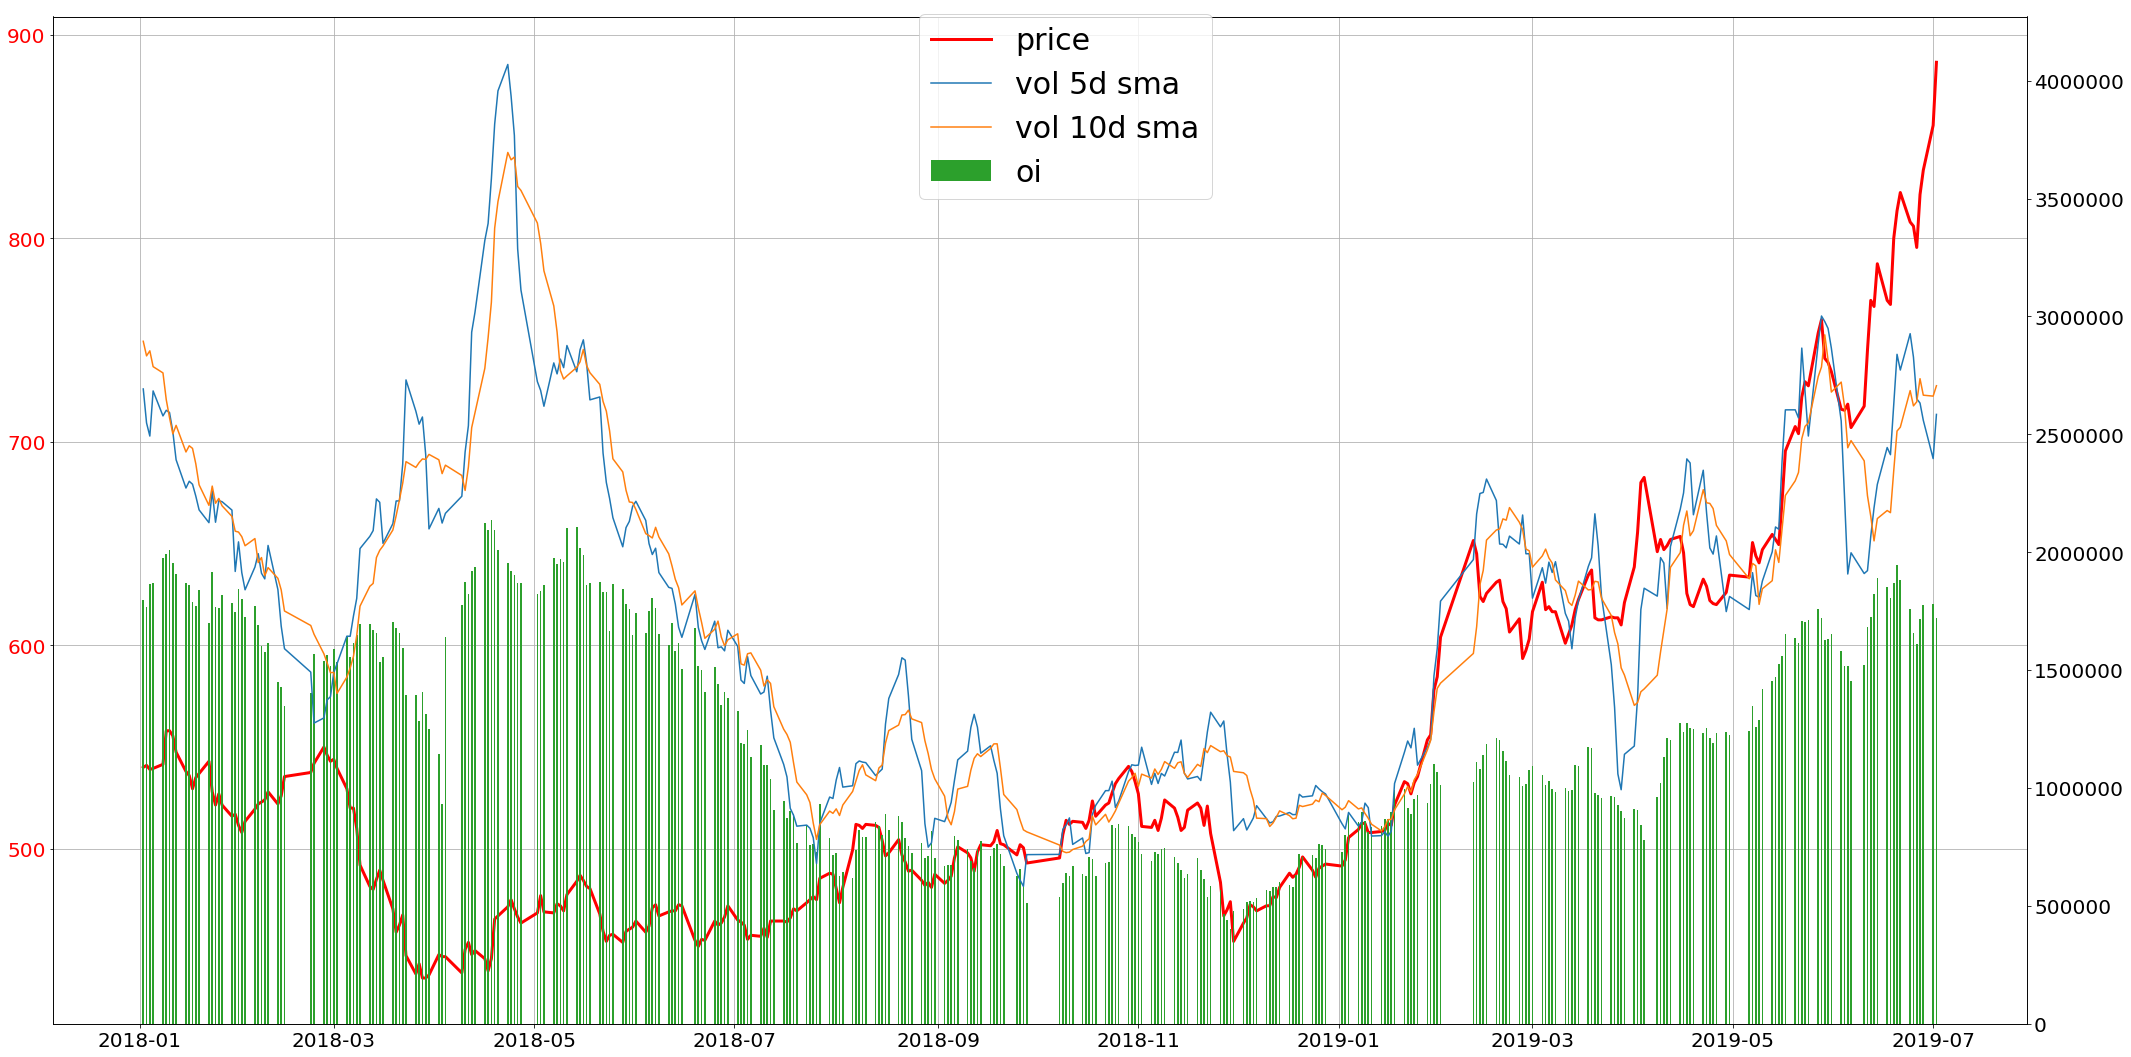

In [255]:
this_df = df[(df['date'] >= '2018-1-1')]
fig, ax1 = plt.subplots()

color="red"
ax1.plot(this_df["date"], this_df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

ax2.plot(this_df["date"], this_df["vol sma"], color="tab:blue", label="vol 5d sma")
ax2.plot(this_df["date"], this_df["vol 10d sma"], color="tab:orange", label="vol 10d sma")
ax2.bar(this_df["date"], this_df["oi"], color="tab:green", label="oi", width=0.5)
#ax2.bar(this_df["date"], this_df["vol std"], color="tab:green", label="vol 5d std", width=0.5)

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

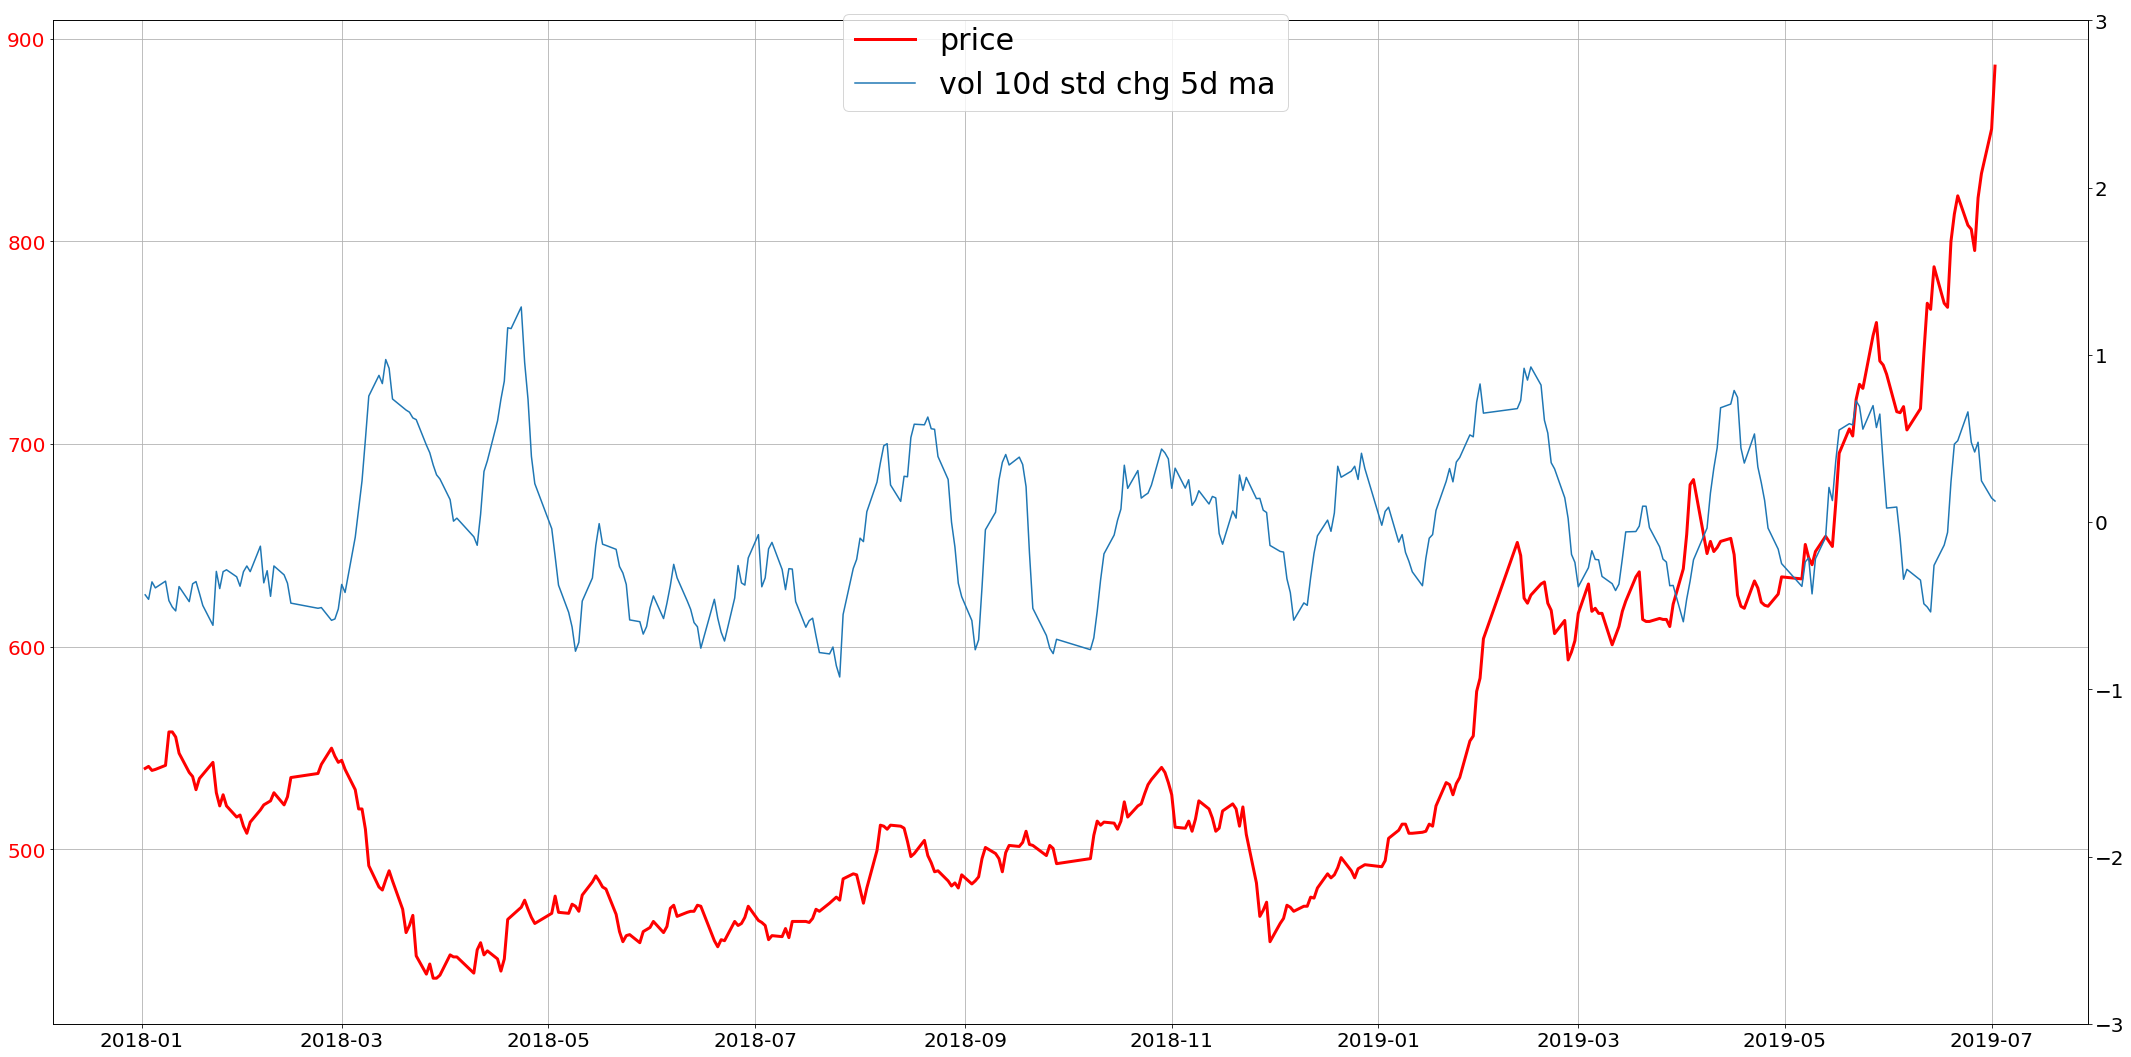

In [263]:
this_df = df[(df['date'] >= '2018-1-1')]
fig, ax1 = plt.subplots()

color="red"
ax1.plot(this_df["date"], this_df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

ax2.plot(this_df["date"], this_df["vol std chg ma"], color="tab:blue", label="vol 10d std chg 5d ma")
#ax2.plot(this_df["date"], this_df["vol chg"], color="tab:orange", label="vol chg")
#ax2.plot(this_df["date"], this_df["oi chg"], color="tab:green",  label="oi chg")
#ax2.plot(this_df["date"], this_df["oi %chg"], color="tab:orange", label="oi %chg")
axes = plt.gca()
axes.set_ylim([-3,3])

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

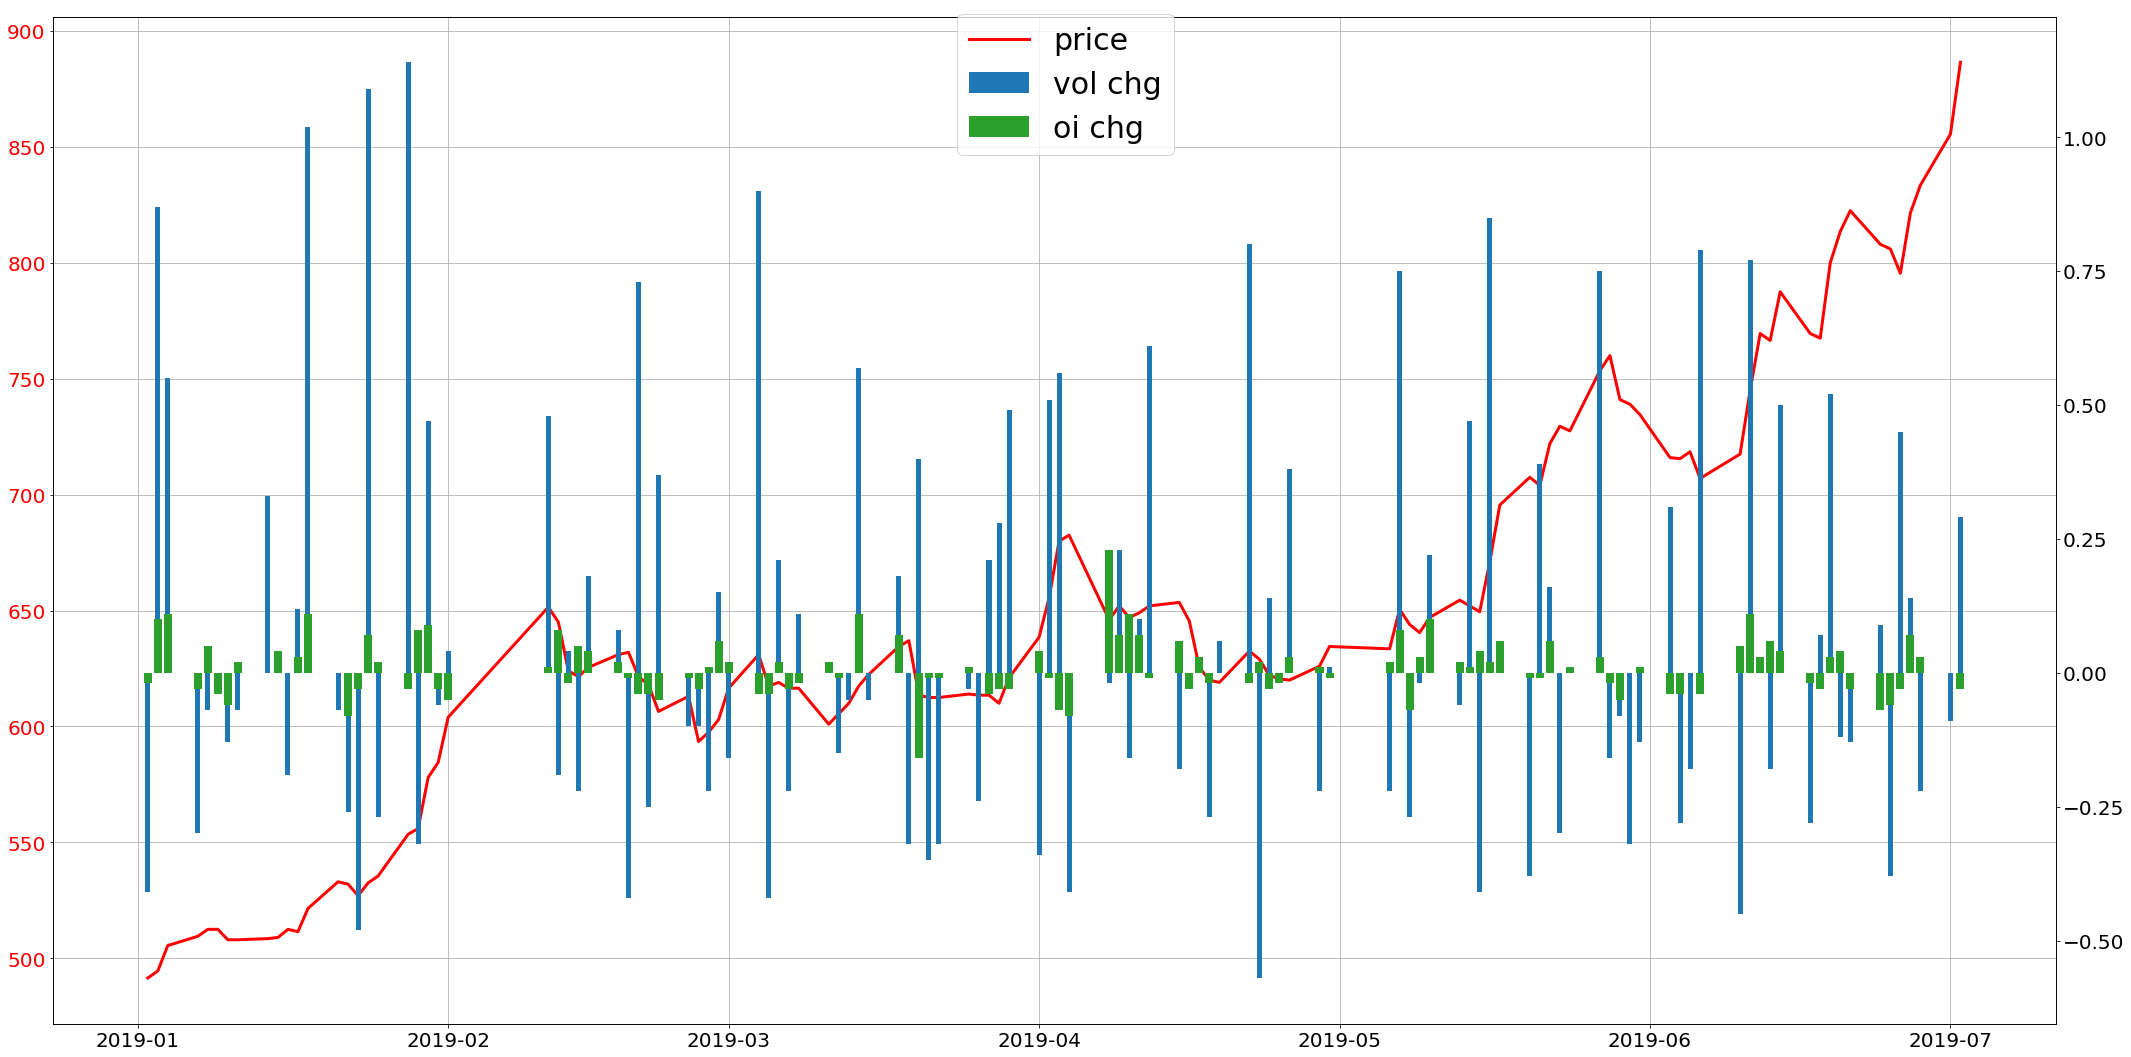

In [259]:
this_df = df[(df['date'] >= '2019-1-1')]
fig, ax1 = plt.subplots()

color="red"
ax1.plot(this_df["date"], this_df["price"], color=color, linewidth=3, label="price")

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

ax2.bar(this_df["date"], this_df["vol chg"], color="tab:blue", label="vol chg", width=0.5)
ax2.bar(this_df["date"], this_df["oi chg"], color="tab:green",  label="oi chg")

#ax2.bar(this_df["date"], this_df["vol %chg"], color="tab:orange", label="vol %chg")
axes = plt.gca()
#axes.set_ylim([-5,5])

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()


#plt.plot(this_df["date"], this_df["price %chg"], color="red",  label="price %chg")
#plt.bar(this_df["date"], this_df["vol %chg"],  color="tab:orange", label="vol %chg")
#plt.plot(this_df["date"], this_df["oi %chg"], color="tab:green",  label="oi %chg")
#plt.bar(this_df["date"], this_df["vol std chg"], color="tab:blue",  label="vol 10d std chg")

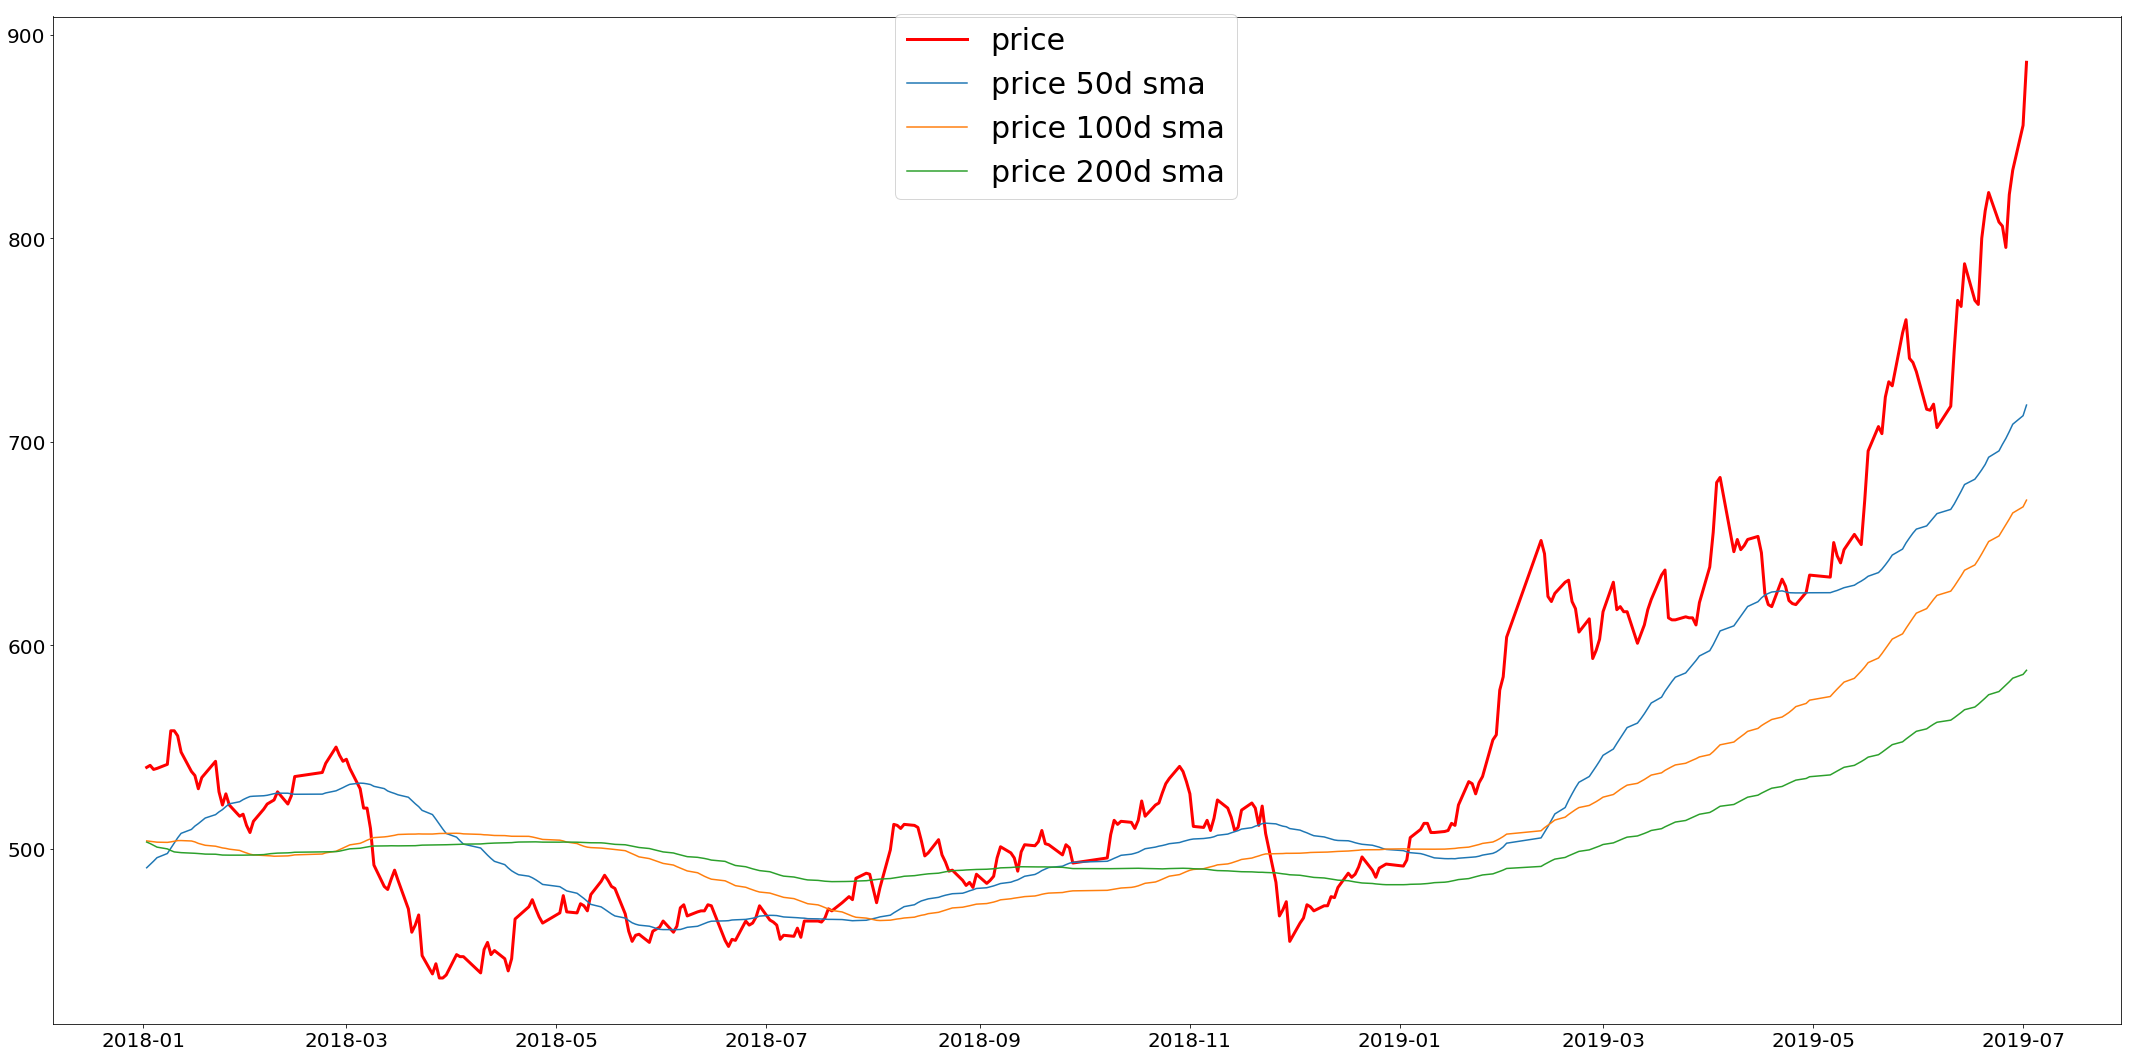

In [232]:
this_df = df[(df['date'] >= '2018-1-1')]
fig, ax1 = plt.subplots()

ax1.plot(this_df["date"], this_df["price"], color="red", linewidth=3, label="price")
ax1.plot(this_df["date"], this_df["price 50d sma"], color="tab:blue", label="price 50d sma")
ax1.plot(this_df["date"], this_df["price 100d sma"], color="tab:orange", label="price 100d sma")
ax1.plot(this_df["date"], this_df["price 200d sma"], color="tab:green", label="price 200d sma")

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

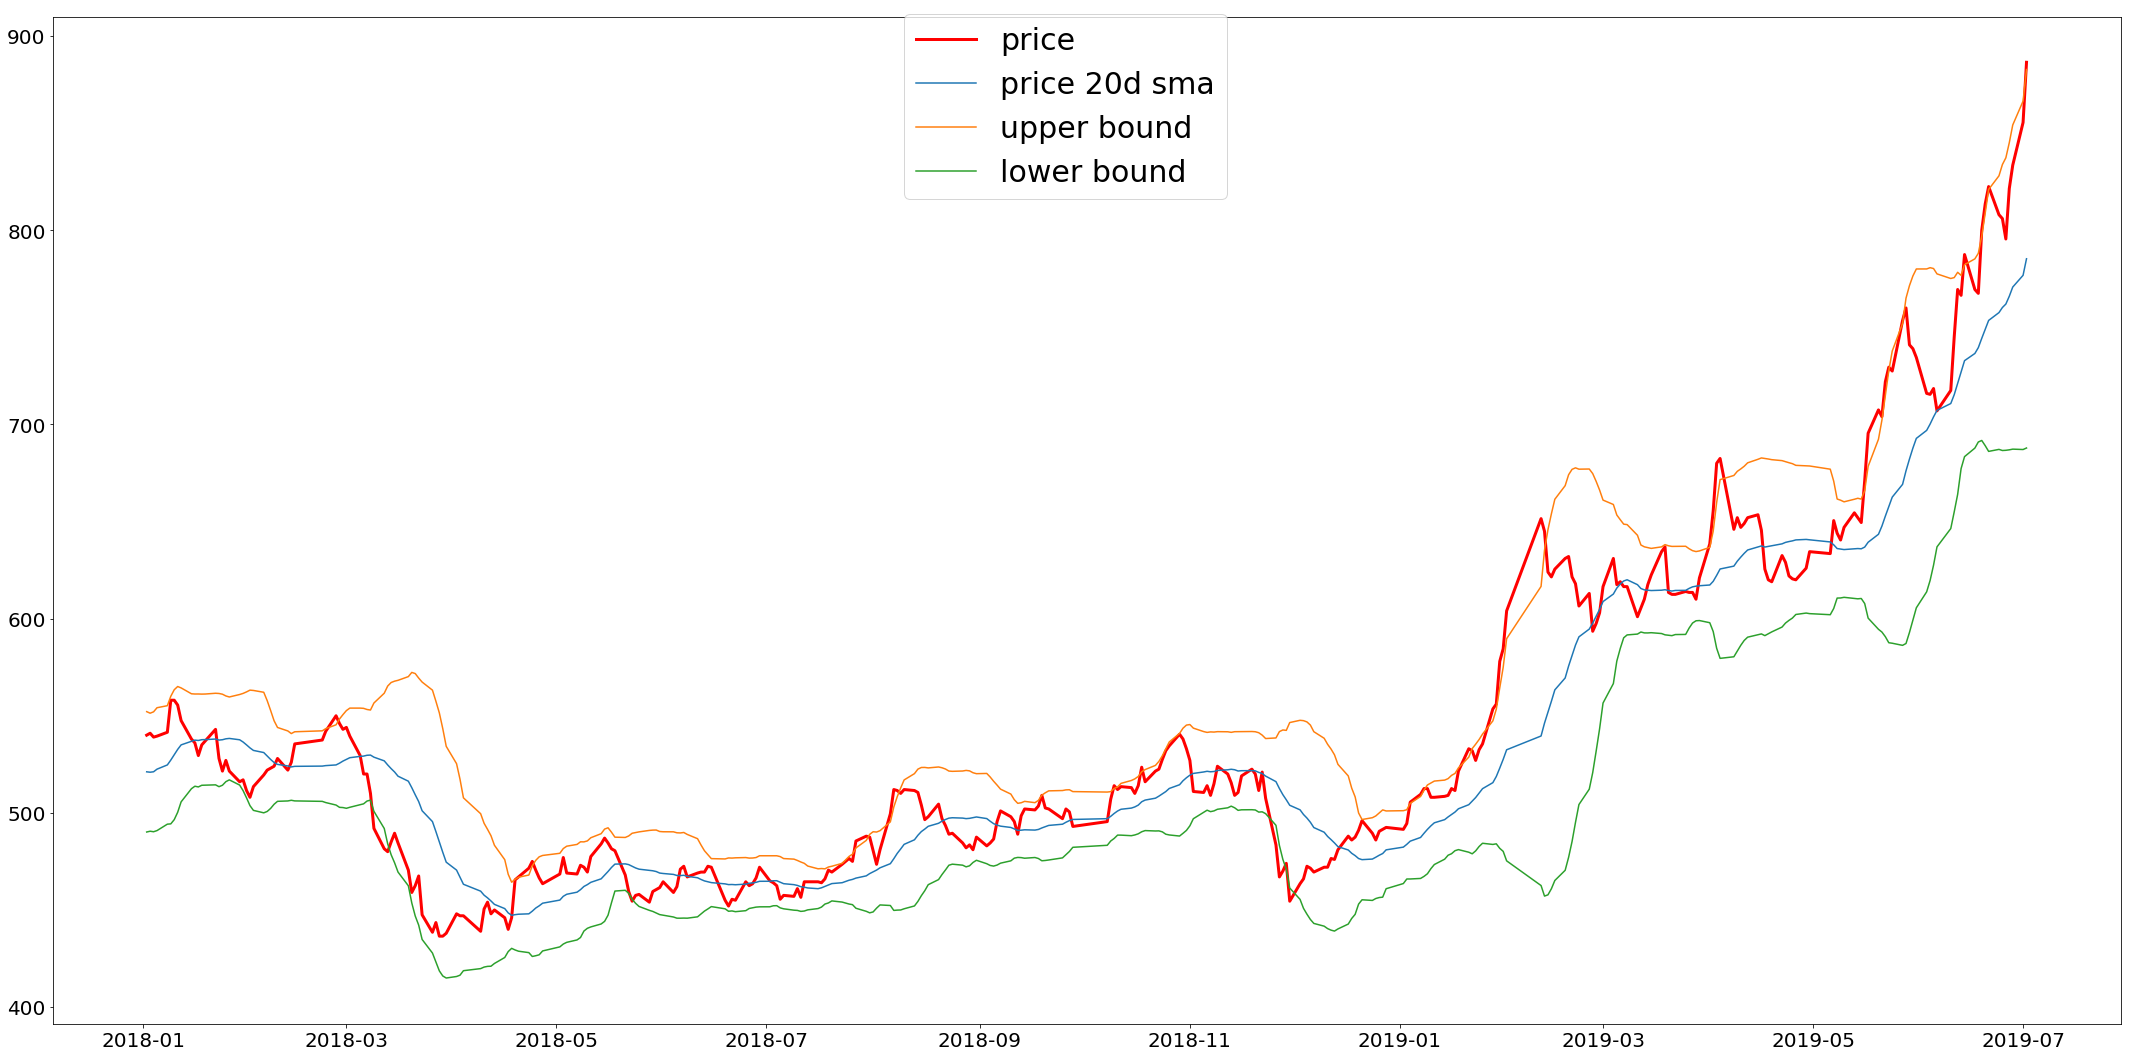

In [227]:
df["upper bound"] = df["price 20d sma"] + 2*df["price"].rolling(20).std()
df["lower bound"] = df["price 20d sma"] - 2*df["price"].rolling(20).std()

this_df = df[(df['date'] >= '2018-1-1')]
fig, ax1 = plt.subplots()

ax1.plot(this_df["date"], this_df["price"], color="red", linewidth=3, label="price")
ax1.plot(this_df["date"], this_df["price 20d sma"], color="tab:blue", label="price 20d sma")
ax1.plot(this_df["date"], this_df["upper bound"], color="tab:orange", label="upper bound")
ax1.plot(this_df["date"], this_df["lower bound"], color="tab:green", label="lower bound")

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()